# SOMMAIRE

1. [Importation des bibliothèques et des données](#Importation-des-bibliothèques-et-des-données)
2. [Analyse et nettoyage des données](#Analyse-et-nettoyage-des-données)
    1. [Exploration CUSTOMERS](#Exporation-CUSTOMERS)
    2. [Exploration PRODUCTS](#Exploration-PRODUCTS)
    3. [Exploration TRANSACTIONS](#Exploration-TRANSACTIONS)
3. [Création du dataframe final](#Création-du-dataframe-final)

## Importation des bibliothèques et des données

In [1]:
#importation des bibliothèques necessaires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns

In [2]:
#importation de la data

customers = pd.read_csv ('customers.csv', sep=';')
products = pd.read_csv ('products.csv', sep=';')
transactions = pd.read_csv ('transactions.csv', sep=';', dtype=str, low_memory=False)
transactions['date'] = pd.to_datetime(transactions['date'], format='%Y-%m-%d %H:%M:%S.%f')

## Analyse et nettoyage des données

### Exporation CUSTOMERS

In [3]:
#Taille du dataset
pd.DataFrame(customers)
print(f"Customers a {customers.shape[0]} lignes et {customers.shape[1]} colonnes.")

Customers a 8621 lignes et 3 colonnes.


In [4]:
customers.head(5)

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
# Vérifier le type des colonnes
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [6]:
# Vérifier les valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [7]:
customers.info

<bound method DataFrame.info of      client_id sex  birth
0       c_4410   f   1967
1       c_7839   f   1975
2       c_1699   f   1984
3       c_5961   f   1962
4       c_5320   m   1943
...        ...  ..    ...
8616    c_7920   m   1956
8617    c_7403   f   1970
8618    c_5119   m   1974
8619    c_5643   f   1968
8620      c_84   f   1982

[8621 rows x 3 columns]>

In [8]:
customers.duplicated().any()

False

In [9]:
def verifier_unicite(df, cle):
    total_lignes = len(df)
    lignes_uniques = df[cle].nunique()

    if lignes_uniques == total_lignes:
        return f"La clé '{cle}' est unique et le nombre de lignes uniques ({lignes_uniques}) correspond au nombre total de lignes ({total_lignes})."
    else:
                return (f"La clé '{cle}' n'est pas unique. Le nombre de lignes uniques ({lignes_uniques}) ne correspond pas au nombre total de lignes ({total_lignes}). "
               )

#Vérification du df customers
resultat_customers = verifier_unicite(customers, 'client_id')
print(resultat_customers)


La clé 'client_id' est unique et le nombre de lignes uniques (8621) correspond au nombre total de lignes (8621).


In [10]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8621 entries, 0 to 8620
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8621 non-null   object
 1   sex        8621 non-null   object
 2   birth      8621 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [11]:
# Calculer l'année actuelle
current_year = datetime.now().year

# Créer une nouvelle colonne 'age'
customers['age'] = current_year - customers['birth']


# Afficher les premières lignes du DataFrame pour vérifier
print(customers.head())

  client_id sex  birth  age
0    c_4410   f   1967   57
1    c_7839   f   1975   49
2    c_1699   f   1984   40
3    c_5961   f   1962   62
4    c_5320   m   1943   81


In [12]:
#age moyen et box plot de l'age
customers['age'].describe()

count    8621.000000
mean       45.724394
std        16.917958
min        20.000000
25%        32.000000
50%        45.000000
75%        58.000000
max        95.000000
Name: age, dtype: float64

In [13]:
# Définir les tranches d'âge (bins)
bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99']

# Créer une nouvelle colonne 'age_group' avec les tranches d'âge
customers['tranche_age'] = pd.cut(customers['age'], bins=bins, labels=labels, right=False)

# Afficher les premières lignes du DataFrame pour vérifier
print(customers.head(5))

  client_id sex  birth  age tranche_age
0    c_4410   f   1967   57       50-59
1    c_7839   f   1975   49       40-49
2    c_1699   f   1984   40       40-49
3    c_5961   f   1962   62       60-69
4    c_5320   m   1943   81       80-89


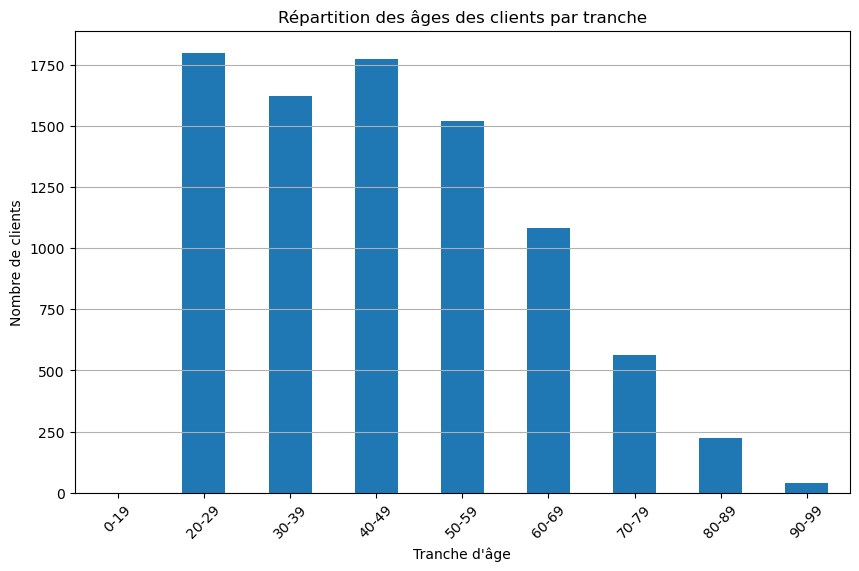

In [14]:
# Compter le nombre de clients dans chaque tranche d'âge
tranche_age_counts = customers['tranche_age'].value_counts().sort_index()

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
tranche_age_counts.plot(kind='bar')
plt.title('Répartition des âges des clients par tranche')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre de clients')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Afficher le graphique
plt.show()

La majorité des clients se situe dans les tranches d'âge de 20 à 59 ans.
Baisse notable dans les tranches d'âge supérieures à 50 ans, avec une diminution progressive très marquée après 70 ans.

In [15]:
# Compter le nombre d'hommes et de femmes
gender_counts = customers['sex'].value_counts()

# Afficher le nombre d'hommes et de femmes
print(gender_counts)

sex
f    4490
m    4131
Name: count, dtype: int64


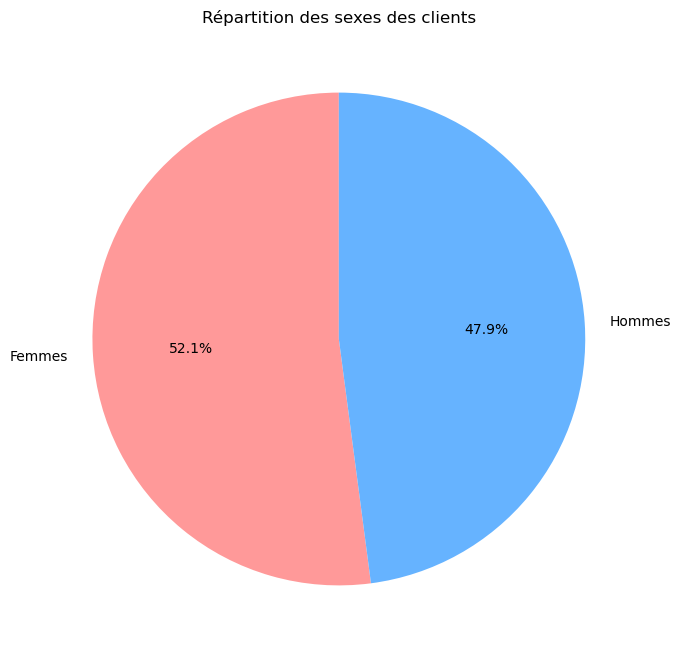

In [16]:
# Créer un piechart
plt.figure(figsize=(8, 8))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'], labels=['Femmes', 'Hommes'])
plt.title('Répartition des sexes des clients')
plt.ylabel('')
plt.show()

Répartition par genre légèrement en faveur des femmes, mais resultat proche de la parité.

### Exploration PRODUCTS

In [17]:
pd.DataFrame(products)
print(f"Products a {products.shape[0]} lignes et {products.shape[1]} colonnes.")

Products a 3286 lignes et 3 colonnes.


In [18]:
products.head(10)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
5,0_1163,9.99,0
6,1_463,36.99,1
7,0_2157,34.99,0
8,0_1915,16.99,0
9,0_389,18.99,0


In [19]:
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [20]:
products['id_prod'] = products['id_prod'].astype(str)

In [21]:
nan_count_products = products.isnull().sum()
print("Nombre de valeurs NaN dans chaque colonne :")
print(nan_count_products)


Nombre de valeurs NaN dans chaque colonne :
id_prod    0
price      0
categ      0
dtype: int64


In [22]:
resultat_products = verifier_unicite(products, 'id_prod')
print(resultat_products)

La clé 'id_prod' est unique et le nombre de lignes uniques (3286) correspond au nombre total de lignes (3286).


In [23]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3286 entries, 0 to 3285
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.1+ KB


In [24]:
products.describe(include='all')

,id_prod,price,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


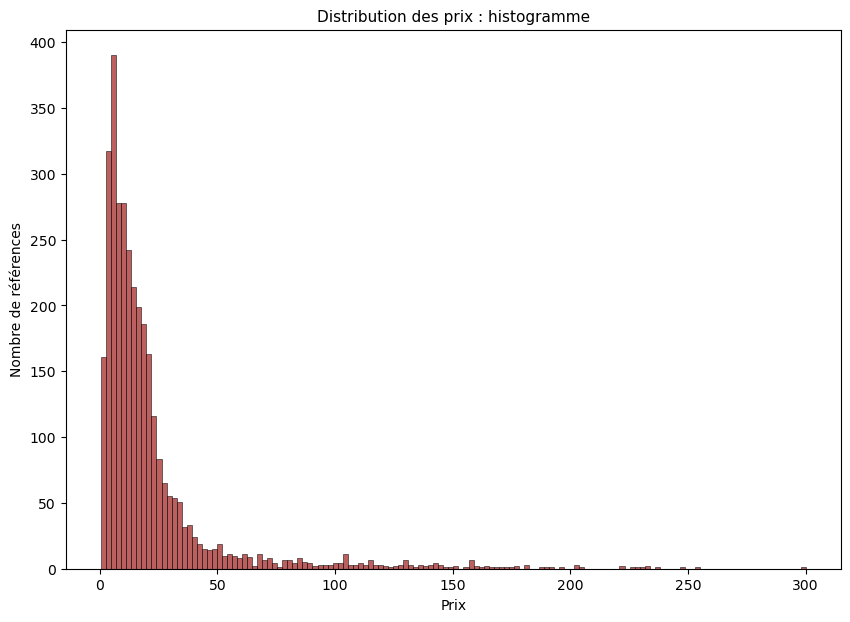

In [25]:

# Répartition des prix de ventes
plt.figure(figsize=(10, 7))
sns.histplot(data=products, x='price', color='brown')
plt.title('Distribution des prix : histogramme', fontsize=11)
plt.xlabel('Prix')
plt.ylabel('Nombre de références')
plt.show()

La distribution est fortement concentrée vers le côté gauche du graphique, indiquant que la majorité des produits sont à bas prix (cohérent avec une librairie). 
Le nombre de références diminue rapidement à mesure que le prix augmente.

In [26]:
products.groupby('categ').size()

categ
0    2308
1     739
2     239
dtype: int64

In [27]:
# prix par categorie

for cat in products['categ'].unique():
    subset = products[products.categ == cat]
    print("-"*20)
    print("Catégorie de livres",cat)
    print("min:",subset['price'].min())
    print("max:",subset['price'].max())
    print("moy:",round(subset['price'].mean(),2))
    print("med:",round(subset['price'].median(),2))
    print("mod:",round(subset['price'].mode(),2))
    print("var:",round(subset['price'].var(ddof=0),2))
    print("ect:",round(subset['price'].std(ddof=0),2))

--------------------
Catégorie de livres 0
min: 0.62
max: 40.99
moy: 11.73
med: 10.32
mod: 0    4.99
Name: price, dtype: float64
var: 57.22
ect: 7.56
--------------------
Catégorie de livres 1
min: 2.0
max: 80.99
moy: 25.53
med: 22.99
mod: 0    22.99
1    32.99
Name: price, dtype: float64
var: 237.61
ect: 15.41
--------------------
Catégorie de livres 2
min: 30.99
max: 300.0
moy: 108.35
med: 101.99
mod: 0    50.99
1    68.99
2    69.99
Name: price, dtype: float64
var: 2446.06
ect: 49.46


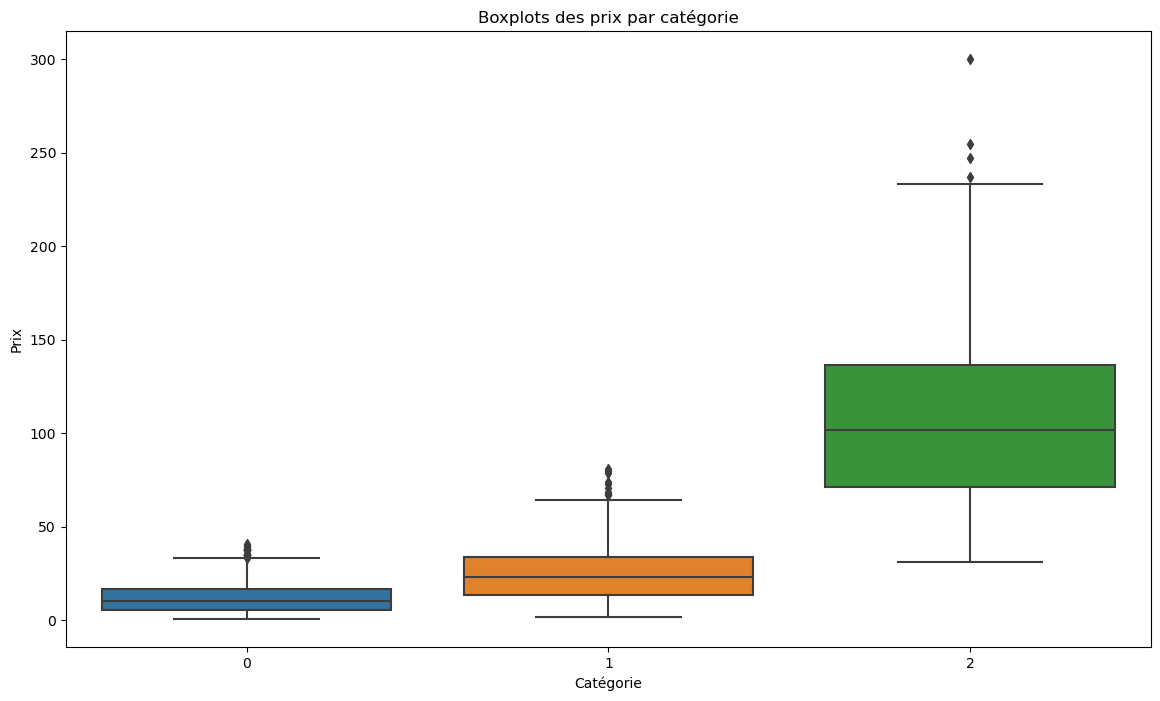

In [28]:
# Créer le boxplot avec Seaborn
plt.figure(figsize=(14, 8))
sns.boxplot(x='categ', y='price', data=products)

# Configurer les labels et le titre
plt.xlabel('Catégorie')
plt.ylabel('Prix')
plt.title('Boxplots des prix par catégorie')

# Afficher le graphique
plt.show()

Catégorie 0 :
Cette catégorie présente les prix les plus bas avec une médiane très basse, proche de zéro.
La gamme de prix est très étroite, avec peu de variation au-dessus du premier quartile.
Peu de valeurs extrêmes.

Catégorie 1 :
La médiane est légèrement plus élevée que dans la catégorie 0, mais reste modeste.
Il y a une plus grande variabilité des prix dans cette catégorie, comme en témoignent le premier et troisième quartiles plus élargis.
Quelques valeurs extrêmes montrent que certains articles dans cette catégorie peuvent être significativement plus chers que la majorité.

Catégorie 2 :
Cette catégorie a la médiane la plus élevée, ce qui indique que les prix sont généralement plus élevés.
La variabilité des prix est la plus grande parmi les trois catégories.
De nombreuses valeurs extrêmes indiquent que certains produits dans cette catégorie sont exceptionnellement chers.

Implications pour la stratégie de vente :
Catégorie 0 : Parfait pour attirer des clients sensibles aux prix avec des articles à bas coût.
Catégorie 1 : Potentiellement destinée à des acheteurs cherchant un bon rapport qualité-prix.
Catégorie 2 : Idéale pour les produits premium ou spécialisés avec des marges plus élevées.

In [29]:
# Fonction pour trouver les outliers
def find_outliers(df):
    Q1 = df['price'].quantile(0.25)
    Q3 = df['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
    return outliers

# Initialiser un dictionnaire pour stocker les outliers par catégorie
outliers_by_categ = {}

# Trouver et stocker les outliers pour chaque catégorie
categories = products['categ'].unique()
for categ in categories:
    df_categ = products[products['categ'] == categ]
    outliers = find_outliers(df_categ)
    outliers_by_categ[categ] = outliers

# Afficher les outliers par catégorie
for categ, outliers in outliers_by_categ.items():
    print(f"Outliers pour la catégorie {categ}:")
    print(outliers)
    print("\n")

Outliers pour la catégorie 0:
     id_prod  price  categ
7     0_2157  34.99      0
47    0_1629  40.99      0
76     0_548  37.53      0
184   0_1016  35.06      0
384    0_907  34.99      0
391   0_1239  37.99      0
512    0_822  35.30      0
569    0_197  37.99      0
623    0_289  36.99      0
1220  0_1544  37.91      0
1293   0_920  37.46      0
1359   0_494  39.58      0
1670  0_1415  34.99      0
1725   0_604  33.54      0
2091   0_573  34.99      0
2116   0_143  34.99      0
2408  0_2177  34.99      0
2572    0_60  37.64      0
2615  0_1597  33.99      0
2662  0_1581  37.99      0
2808  0_2147  39.99      0
3208  0_1749  34.99      0


Outliers pour la catégorie 1:
     id_prod  price  categ
204    1_496  70.51      1
742    1_315  66.99      1
807     1_10  78.83      1
823     1_13  80.99      1
878    1_679  79.99      1
1043   1_354  68.49      1
1694   1_184  67.65      1
2323   1_514  67.66      1
2826   1_171  73.99      1
2961   1_608  72.75      1


Outliers pour la c

### Exploration TRANSACTIONS

In [30]:
pd.DataFrame(transactions)
print(f"Customers a {transactions.shape[0]} lignes et {transactions.shape[1]} colonnes.")

Customers a 1048575 lignes et 4 colonnes.


In [31]:
transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [32]:
nan_count_transactions = transactions.isnull().sum()
print("Nombre de valeurs NaN dans chaque colonne :")
print(nan_count_transactions)


Nombre de valeurs NaN dans chaque colonne :
id_prod       361041
date          361041
session_id    361041
client_id     361041
dtype: int64


In [33]:
transactions['id_prod'].nunique()

3265

In [34]:
transactions['client_id'].nunique()

8600

In [35]:
transactions.isnull().head(5)

,id_prod,date,session_id,client_id
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [36]:
resultat_transactions = verifier_unicite(transactions, 'id_prod')
print(resultat_transactions)

La clé 'id_prod' n'est pas unique. Le nombre de lignes uniques (3265) ne correspond pas au nombre total de lignes (1048575). 


In [37]:
resultat_transactions = verifier_unicite(transactions, 'client_id')
print(resultat_transactions)

La clé 'client_id' n'est pas unique. Le nombre de lignes uniques (8600) ne correspond pas au nombre total de lignes (1048575). 


In [38]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 32.0+ MB


In [39]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,687534,687534,687534,687534
unique,3265,NaN,345505,8600
top,1_369,NaN,s_118668,c_1609
freq,2340,NaN,14,25586
mean,NaN,2022-03-01 21:24:00.618519296,NaN,NaN
min,NaN,2021-03-01 00:01:07.843138,NaN,NaN
25%,NaN,2021-09-10 10:35:20.642323456,NaN,NaN
50%,NaN,2022-02-27 06:50:25.400120064,NaN,NaN
75%,NaN,2022-08-28 22:16:49.841665536,NaN,NaN
max,NaN,2023-02-28 23:58:30.792755,NaN,NaN


In [40]:
# Extraire les années et les mois des dates
transactions['year_month'] = transactions['date'].dt.to_period('M')

# Obtenir l'ensemble des années et des mois présents dans les données
present_months = set(transactions['year_month'])

# Générer l'ensemble des mois complets entre la date min et la date max
all_months = pd.period_range(start=transactions['date'].min(), end=transactions['date'].max(), freq='M')
all_months_set = set(all_months)

# Identifier les mois manquants
missing_months = all_months_set - present_months

# Afficher les résultats
print("Mois manquants:", missing_months)

Mois manquants: set()


In [41]:
transactions.duplicated().any()

True

In [42]:
# Analyser le pourcentage de valeurs manquantes
missing_percentage = transactions.isnull().mean() * 100
print("Pourcentage de valeurs manquantes dans chaque colonne :")
print(missing_percentage)

Pourcentage de valeurs manquantes dans chaque colonne :
id_prod       34.431586
date          34.431586
session_id    34.431586
client_id     34.431586
year_month    34.431586
dtype: float64


In [43]:
# Supprimer les lignes contenant des valeurs NaN
transactions_clean = transactions.dropna()

# Vérifier les informations du DataFrame nettoyé
transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   year_month  687534 non-null  period[M]     
dtypes: datetime64[ns](1), object(3), period[M](1)
memory usage: 31.5+ MB


## Création du dataframe final

In [44]:
merge_1 = pd.merge( customers, transactions_clean, on='client_id', how='right')

In [45]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   client_id    687534 non-null  object        
 1   sex          687534 non-null  object        
 2   birth        687534 non-null  int64         
 3   age          687534 non-null  int64         
 4   tranche_age  687534 non-null  category      
 5   id_prod      687534 non-null  object        
 6   date         687534 non-null  datetime64[ns]
 7   session_id   687534 non-null  object        
 8   year_month   687534 non-null  period[M]     
dtypes: category(1), datetime64[ns](1), int64(2), object(4), period[M](1)
memory usage: 42.6+ MB


In [46]:
# Vérifier les lignes exclues de customers
exclu_customers = customers[~customers['client_id'].isin(merge_1['client_id'])]
print("\nLignes exclues de customers :")
print(exclu_customers)

# Vérifier les lignes exclues de transactions_clean
exclu_transactions = transactions_clean[~transactions_clean['client_id'].isin(merge_1['client_id'])]
print("\nLignes exclues de transactions_clean :")
print(exclu_transactions)


Lignes exclues de customers :
     client_id sex  birth  age tranche_age
801     c_8253   f   2001   23       20-29
2483    c_3789   f   1997   27       20-29
2734    c_4406   f   1998   26       20-29
2768    c_2706   f   1967   57       50-59
2850    c_3443   m   1959   65       60-69
3178    c_4447   m   1956   68       60-69
3189    c_3017   f   1992   32       30-39
3333    c_4086   f   1992   32       30-39
3720    c_6930   m   2004   20       20-29
3820    c_4358   m   1999   25       20-29
4723    c_8381   f   1965   59       50-59
4790    c_1223   m   1963   61       60-69
6111    c_6862   f   2002   22       20-29
6207    c_5245   f   2004   20       20-29
6337    c_5223   m   2003   21       20-29
6470    c_6735   m   2004   20       20-29
6584     c_862   f   1956   68       60-69
6827    c_7584   f   1960   64       60-69
7789      c_90   m   2001   23       20-29
7818     c_587   m   1993   31       30-39
8534    c_3526   m   1956   68       60-69

Lignes exclues de tran

In [47]:
merge_2 = pd.merge (merge_1, products, on='id_prod', how='left')

In [48]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 687534 entries, 0 to 687533
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   client_id    687534 non-null  object        
 1   sex          687534 non-null  object        
 2   birth        687534 non-null  int64         
 3   age          687534 non-null  int64         
 4   tranche_age  687534 non-null  category      
 5   id_prod      687534 non-null  object        
 6   date         687534 non-null  datetime64[ns]
 7   session_id   687534 non-null  object        
 8   year_month   687534 non-null  period[M]     
 9   price        687534 non-null  float64       
 10  categ        687534 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(4), period[M](1)
memory usage: 53.1+ MB


In [49]:
# Vérifier les lignes exclues de products
exclu_products = products[~products['id_prod'].isin(merge_1['id_prod'])]
print("\nLignes exclues de products :")
print(exclu_products)


Lignes exclues de products :
     id_prod   price  categ
184   0_1016   35.06      0
279   0_1780    1.67      0
736   0_1062   20.08      0
793   0_1119    2.99      0
810   0_1014    1.15      0
845      1_0   31.82      1
1030  0_1318   20.92      0
1138  0_1800   22.05      0
1346  0_1645    2.99      0
1504   0_322    2.99      0
1529  0_1620    0.80      0
1542  0_1025   24.99      0
1708    2_87  220.99      2
1862   1_394   39.73      1
1945    2_72  141.32      2
2214   0_310    1.94      0
2407  0_1624   24.50      0
2524    2_86  132.36      2
2689   0_299   22.99      0
3030   0_510   23.66      0
3095  0_2308   20.28      0


In [50]:
merge_2.describe(include='all')

,client_id,sex,birth,age,tranche_age,id_prod,date,session_id,year_month,price,categ
count,687534,687534,687534.000000,687534.000000,687534,687534,687534,687534,687534,687534.000000,687534.000000
unique,8600,2,NaN,NaN,8,3265,NaN,345505,24,NaN,NaN
top,c_1609,m,NaN,NaN,40-49,1_369,NaN,s_118668,2021-09,NaN,NaN
freq,25586,344841,NaN,NaN,235083,2340,NaN,14,33314,NaN,NaN
mean,NaN,NaN,1977.817391,46.182609,NaN,NaN,2022-03-01 21:24:00.618519296,NaN,NaN,17.493918,0.448789
min,NaN,NaN,1929.000000,20.000000,NaN,NaN,2021-03-01 00:01:07.843138,NaN,NaN,0.620000,0.000000
25%,NaN,NaN,1970.000000,37.000000,NaN,NaN,2021-09-10 10:35:20.642323456,NaN,NaN,8.990000,0.000000
50%,NaN,NaN,1980.000000,44.000000,NaN,NaN,2022-02-27 06:50:25.400120064,NaN,NaN,13.990000,0.000000
75%,NaN,NaN,1987.000000,54.000000,NaN,NaN,2022-08-28 22:16:49.841665536,NaN,NaN,19.080000,1.000000
max,NaN,NaN,2004.000000,95.000000,NaN,NaN,2023-02-28 23:58:30.792755,NaN,NaN,300.000000,2.000000


In [51]:
# Exporter le DataFrame en fichier CSV
file_path = '/Users/bastienrabane/Library/CloudStorage/OneDrive-Personnel/Documents/OC DATA ANALYST/Projet 9/merge_2.csv'
merge_2.to_csv(file_path, index=False)
